In [2]:
import pandas as pd
import numpy as np
import re
import sys
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt

/tmp/ipykernel_14395/4014031421.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Step 1: Data Collection
df = pd.read_csv('crypto_addresses.csv')

In [4]:
# Step 2: Data Preprocessing
# Convert addresses to lowercase
df['address'] = df['address'].str.lower()

In [5]:
# Step 3: Feature Engineering
def extract_features(address):
    """
    Extracts features from a cryptocurrency address.
    
    Args:
    address (str): The cryptocurrency address.
    
    Returns:
    dict: A dictionary of extracted features.
    """
    features = {
        'length': len(address),
        'num_digits': sum(c.isdigit() for c in address),
        'num_letters': sum(c.isalpha() for c in address),
        'num_special': sum(not c.isalnum() for c in address),
        'starts_with_1': address.startswith('1'),
        'starts_with_3': address.startswith('3'),
        'starts_with_0x': address.startswith('0x'),
        'starts_with_t': address.startswith('t'),
        'starts_with_r': address.startswith('r'),
        'starts_with_l': address.startswith('l'),
        'starts_with_addr1': address.startswith('addr1'),
        'starts_with_bnb': address.startswith('bnb'),
        'starts_with_4': address.startswith('4'),
        'starts_with_tz1': address.startswith('tz1'),
        'starts_with_eos': address.startswith('eos'),
        'starts_with_g': address.startswith('g'),
        'starts_with_t1': address.startswith('t1'),
        'starts_with_a': address.startswith('a'),
        'starts_with_x-': address.startswith('x-')
    }
    
    # Character frequency features
    for char in '123456789abcdef':
        features[f'freq_{char}'] = address.count(char) / len(address)
    
    return features

In [6]:
# Apply feature extraction
features = df['address'].apply(extract_features)
features_df = pd.DataFrame(list(features))

# Combine features with labels
features_df['type'] = df['type']

In [7]:
# Step 4: Model Selection and Training
# Split the data into training and test sets (80% training, 20% test)
X = features_df.drop('type', axis=1)
y = features_df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Step 5: Model Evaluation on the validation set
# Make predictions on the test set
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Evaluation on Validation Set")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

# Analyzing the performance metrics
print("\nAnalysis of Performance Metrics:")

# Accuracy
print(f"Accuracy: {accuracy:.4f}")

Model Evaluation on Validation Set
Accuracy: 0.8358333333333333
Classification Report:
               precision    recall  f1-score   support

         ADA       1.00      1.00      1.00       196
        ALGO       1.00      1.00      1.00       196
        AVAX       1.00      1.00      1.00       188
         BSC       1.00      1.00      1.00       213
         BTC       0.46      0.49      0.48       187
         DOT       0.51      0.48      0.49       206
         EOS       1.00      1.00      1.00       204
         ETH       0.38      0.41      0.39       198
        LINK       0.31      0.32      0.31       190
         LTC       1.00      1.00      1.00       210
         SOL       1.00      1.00      1.00       196
         TRX       1.00      1.00      1.00       208
         VET       0.32      0.28      0.30       196
         XLM       1.00      1.00      1.00       194
         XMR       1.00      1.00      1.00       210
         XRP       1.00      1.00      1.00    

In [10]:
# Precision, Recall, F1-Score for each class
class_report = classification_report(y_test, y_pred, output_dict=True)
for crypto_type in class_report.keys():
    if crypto_type not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = class_report[crypto_type]['precision']
        recall = class_report[crypto_type]['recall']
        f1_score = class_report[crypto_type]['f1-score']
        print(f"\n{crypto_type} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")



ADA - Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

ALGO - Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

AVAX - Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

BSC - Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

BTC - Precision: 0.4623, Recall: 0.4920, F1-Score: 0.4767

DOT - Precision: 0.5103, Recall: 0.4806, F1-Score: 0.4950

EOS - Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

ETH - Precision: 0.3750, Recall: 0.4091, F1-Score: 0.3913

LINK - Precision: 0.3065, Recall: 0.3211, F1-Score: 0.3136

LTC - Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

SOL - Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

TRX - Precision: 1.0000, Recall: 0.9952, F1-Score: 0.9976

VET - Precision: 0.3195, Recall: 0.2755, F1-Score: 0.2959

XLM - Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

XMR - Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

XRP - Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

XTZ - Precision: 0.9953, Recall: 1.0000, F1-Score: 0

In [11]:
# Feature Importance Analysis
# Extract feature importance from the trained model
feature_importance = model.feature_importances_

# Create a DataFrame for feature importance
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

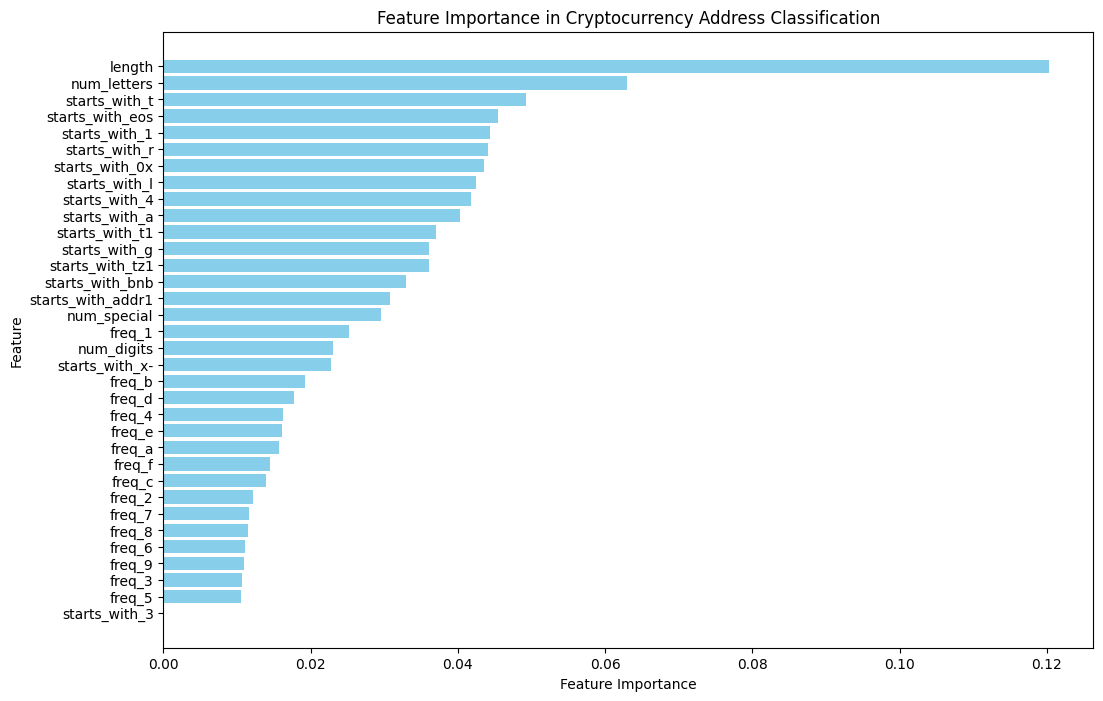

In [12]:
# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Cryptocurrency Address Classification')
plt.gca().invert_yaxis()
plt.show()

In [15]:
# Display the top 10 important features
print("Top 10 Important Features:")
print(importance_df.head(10))

Top 10 Important Features:
            Feature  Importance
0            length    0.120323
2       num_letters    0.063029
7     starts_with_t    0.049241
14  starts_with_eos    0.045427
4     starts_with_1    0.044397
8     starts_with_r    0.044126
6    starts_with_0x    0.043576
9     starts_with_l    0.042452
12    starts_with_4    0.041766
17    starts_with_a    0.040276


In [16]:
# Step 6: Model Deployment
# Save the model
joblib.dump(model, 'crypto_address_classifier.pkl')

['crypto_address_classifier.pkl']

In [17]:
# Function to classify a new cryptocurrency address
def classify_address(address):
    """
    Classifies a given cryptocurrency address using the trained model.
    
    Args:
    address (str): The cryptocurrency address to classify.
    
    Returns:
    str: The predicted type of the cryptocurrency address.
    """
    model = joblib.load('crypto_address_classifier.pkl')
    features = extract_features(address.lower())
    features_df = pd.DataFrame([features])
    prediction = model.predict(features_df)[0]
    return prediction

In [ ]:
# Main function to handle STDIN/STDOUT
def main():
    """
    Main function to read addresses from standard input and classify them.
    """
    print("Enter cryptocurrency addresses to classify (type 'exit' to quit):")
    while True:
        # Read from standard input
        address = input().strip()
        if address.lower() == 'exit':
            break
        # Classify the address
        try:
            result = classify_address(address)
            # Output the result to standard output
            print(f'The address {address} is classified as {result}')
        except Exception as e:
            print(f"Error classifying address: {str(e)}")

if __name__ == "__main__":
    main()

Enter cryptocurrency addresses to classify (type 'exit' to quit):


 TJm72RWCxv53NTCC4eGUCRTqXP2C5NB4R9


The address TJm72RWCxv53NTCC4eGUCRTqXP2C5NB4R9 is classified as TRX


## additional analysis of different models ##

In [17]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine (SVM) Classifier Evaluation:")
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)


Support Vector Machine (SVM) Classifier Evaluation:
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

         ADA       1.00      1.00      1.00       196
        ALGO       1.00      1.00      1.00       196
        AVAX       1.00      1.00      1.00       188
         BSC       1.00      1.00      1.00       213
         BTC       0.48      1.00      0.64       187
         DOT       0.00      0.00      0.00       206
         EOS       1.00      1.00      1.00       204
         ETH       0.00      0.00      0.00       198
        LINK       0.36      0.77      0.49       190
         LTC       1.00      1.00      1.00       210
         SOL       1.00      1.00      1.00       196
         TRX       1.00      1.00      1.00       208
         VET       0.37      0.35      0.36       196
         XLM       1.00      1.00      1.00       194
         XMR       1.00      1.00      1.00       210
         XRP       1.00      1.00      1.00 

/home/shreya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shreya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shreya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from sklearn.ensemble import GradientBoostingClassifier



# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Classifier Evaluation:")
print("Accuracy:", accuracy_gb)
print("Classification Report:\n", report_gb)


Gradient Boosting Classifier Evaluation:
Accuracy: 0.8433333333333334
Classification Report:
               precision    recall  f1-score   support

         ADA       1.00      1.00      1.00       196
        ALGO       1.00      1.00      1.00       196
        AVAX       1.00      1.00      1.00       188
         BSC       1.00      1.00      1.00       213
         BTC       0.52      0.51      0.52       187
         DOT       0.57      0.58      0.57       206
         EOS       1.00      1.00      1.00       204
         ETH       0.37      0.36      0.37       198
        LINK       0.33      0.33      0.33       190
         LTC       1.00      1.00      1.00       210
         SOL       1.00      1.00      1.00       196
         TRX       1.00      1.00      1.00       208
         VET       0.32      0.34      0.33       196
         XLM       1.00      1.00      1.00       194
         XMR       1.00      1.00      1.00       210
         XRP       1.00      1.00      1.

In [19]:
from sklearn.linear_model import LogisticRegression



# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
logistic_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the classifier
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Classifier Evaluation:")
print("Accuracy:", accuracy_logistic)
print("Classification Report:\n", report_logistic)


Logistic Regression Classifier Evaluation:
Accuracy: 0.8444444444444444
Classification Report:
               precision    recall  f1-score   support

         ADA       1.00      1.00      1.00       196
        ALGO       1.00      1.00      1.00       196
        AVAX       1.00      1.00      1.00       188
         BSC       1.00      1.00      1.00       213
         BTC       0.51      0.66      0.57       187
         DOT       0.57      0.41      0.48       206
         EOS       1.00      1.00      1.00       204
         ETH       0.36      0.28      0.32       198
        LINK       0.35      0.45      0.39       190
         LTC       1.00      1.00      1.00       210
         SOL       1.00      1.00      1.00       196
         TRX       1.00      0.99      0.99       208
         VET       0.38      0.36      0.37       196
         XLM       1.00      1.00      1.00       194
         XMR       1.00      1.00      1.00       210
         XRP       1.00      1.00      

/home/shreya/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.neighbors import KNeighborsClassifier


# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Classifier Evaluation:")
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)


K-Nearest Neighbors (KNN) Classifier Evaluation:
Accuracy: 0.8422222222222222
Classification Report:
               precision    recall  f1-score   support

         ADA       1.00      1.00      1.00       196
        ALGO       1.00      1.00      1.00       196
        AVAX       1.00      1.00      1.00       188
         BSC       1.00      1.00      1.00       213
         BTC       0.47      0.49      0.48       187
         DOT       0.52      0.50      0.51       206
         EOS       1.00      1.00      1.00       204
         ETH       0.39      0.56      0.46       198
        LINK       0.35      0.34      0.35       190
         LTC       1.00      1.00      1.00       210
         SOL       1.00      1.00      1.00       196
         TRX       1.00      0.99      1.00       208
         VET       0.35      0.20      0.25       196
         XLM       1.00      1.00      1.00       194
         XMR       1.00      1.00      1.00       210
         XRP       1.00      1.00

In [21]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Evaluate the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Classifier Evaluation:")
print("Accuracy:", accuracy_nb)
print("Classification Report:\n", report_nb)


Naive Bayes Classifier Evaluation:
Accuracy: 0.8433333333333334
Classification Report:
               precision    recall  f1-score   support

         ADA       1.00      1.00      1.00       196
        ALGO       1.00      1.00      1.00       196
        AVAX       1.00      1.00      1.00       188
         BSC       1.00      1.00      1.00       213
         BTC       0.48      0.42      0.45       187
         DOT       0.53      0.59      0.56       206
         EOS       1.00      1.00      1.00       204
         ETH       0.37      0.37      0.37       198
        LINK       0.36      0.37      0.36       190
         LTC       1.00      1.00      1.00       210
         SOL       1.00      1.00      1.00       196
         TRX       1.00      1.00      1.00       208
         VET       0.37      0.36      0.36       196
         XLM       1.00      1.00      1.00       194
         XMR       1.00      1.00      1.00       210
         XRP       1.00      1.00      1.00    

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Classifier Evaluation:")
print("Accuracy:", accuracy_dt)
print("Classification Report:\n", report_dt)


Decision Tree Classifier Evaluation:
Accuracy: 0.8436111111111111
Classification Report:
               precision    recall  f1-score   support

         ADA       1.00      1.00      1.00       196
        ALGO       1.00      1.00      1.00       196
        AVAX       1.00      1.00      1.00       188
         BSC       1.00      1.00      1.00       213
         BTC       0.52      0.53      0.53       187
         DOT       0.56      0.55      0.56       206
         EOS       1.00      1.00      1.00       204
         ETH       0.41      0.36      0.38       198
        LINK       0.32      0.36      0.34       190
         LTC       1.00      1.00      1.00       210
         SOL       1.00      1.00      1.00       196
         TRX       1.00      1.00      1.00       208
         VET       0.32      0.32      0.32       196
         XLM       1.00      1.00      1.00       194
         XMR       1.00      1.00      1.00       210
         XRP       1.00      1.00      1.00  